In [460]:
### Final Capstone project
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter,YearLocator
import matplotlib.dates as mdates

import statsmodels.graphics.tsaplots as tsaplots
from statsmodels.tsa.seasonal import _extrapolate_trend
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import datetime

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose,STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings('ignore')

In [480]:
gold = pd.read_csv('data\HistoricalData_1719985119040.csv')

In [482]:
gold.head()

,Date,Close/Last,Volume,Open,High,Low
0,07/02/2024,2333.4,146568.0,2341.6,2346.1,2327.4
1,07/01/2024,2338.9,136861.0,2336.2,2348.8,2328.2
2,06/28/2024,2339.6,131191.0,2338.6,2350.6,2329.7
3,06/27/2024,2336.6,135784.0,2309.4,2342.0,2306.8
4,06/26/2024,2313.2,182929.0,2331.8,2335.8,2304.7


In [493]:
gold_eda = gold.copy()

In [495]:
gold_eda = gold_eda.set_index(pd.to_datetime(gold_eda['Date'])).drop('Date', axis = 1)

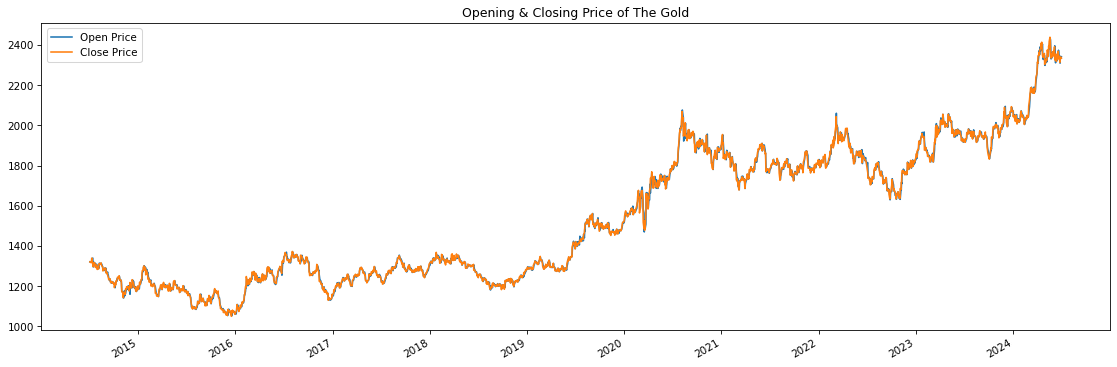

In [497]:
plt.figure(figsize=(15, 5))
gold_eda['Open'].plot()
gold_eda['Close/Last'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Opening & Closing Price of The Gold")
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()

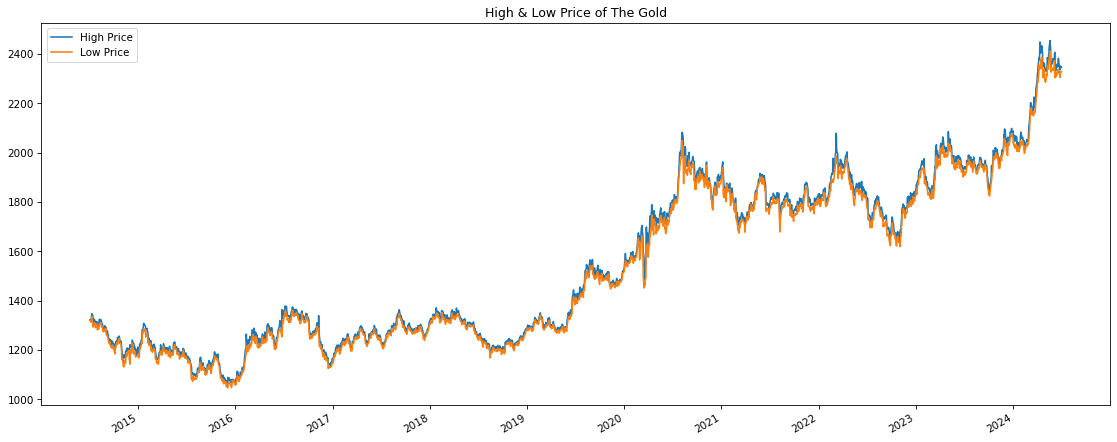

In [499]:
plt.figure(figsize=(15, 6))
gold_eda['High'].plot()
gold_eda['Low'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("High & Low Price of The Gold")
plt.legend(['High Price', 'Low Price'])
plt.tight_layout()
plt.show()

<Axes: xlabel='High', ylabel='Count'>

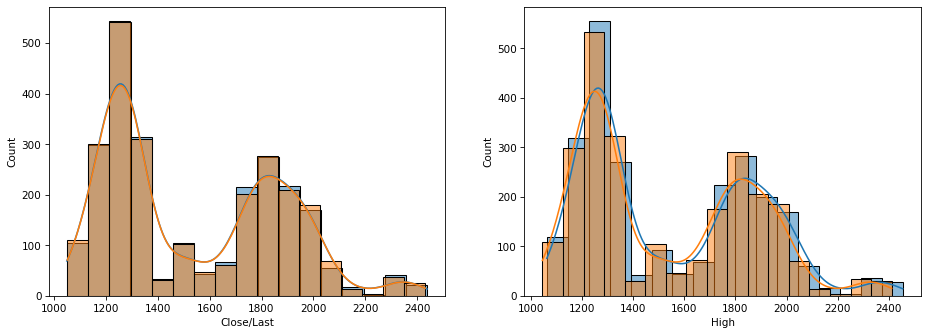

In [501]:

figure,axes = plt.subplots(1,2,figsize=(15,5))

sns.histplot(gold_eda['Close/Last'],kde=True,ax=axes[0])
sns.histplot(gold_eda['Open'],kde=True,ax=axes[0])
sns.histplot(gold_eda['High'],kde=True,ax=axes[1])
sns.histplot(gold_eda['Low'],kde=True,ax=axes[1])

In [503]:
# Now get Global Economic Policy Uncertainty Index:
G_Uncertainity = pd.read_csv('data\GEPUCURRENT.csv').set_index('DATE')

In [505]:
G_Uncertainity.tail()

,GEPUCURRENT
DATE,
2024-01-01,221.219238
2024-02-01,235.483829
2024-03-01,191.002431
2024-04-01,186.115585
2024-05-01,204.645315


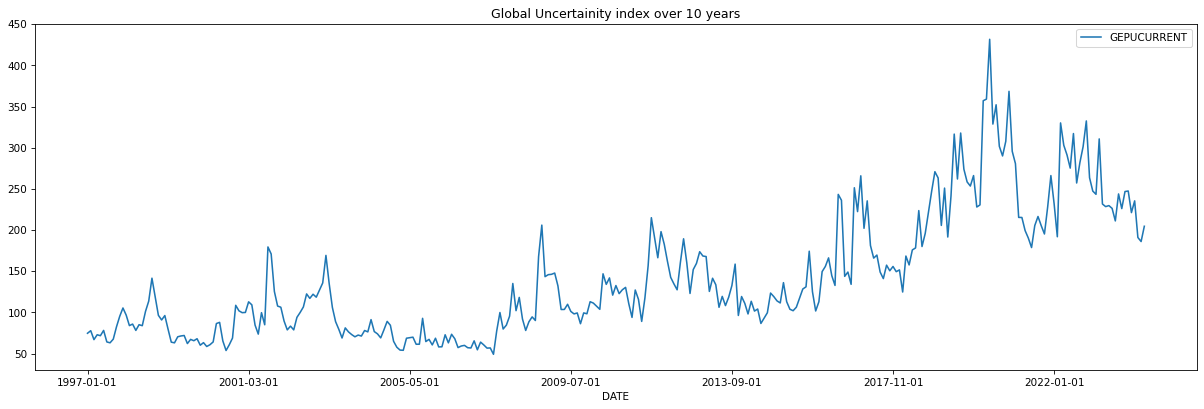

In [508]:
fig, ax = plt.subplots(figsize=(20, 6))
G_Uncertainity.plot(ax=ax, x_compat=True)  # Use x_compat=True for compatibility with date locators
plt.title('Global Uncertainity index over 10 years')

plt.show()

In [510]:
US_Uncertainity = pd.read_csv(r'data\USEPUINDXD.csv').set_index('DATE')
US_Uncertainity.head()

,USEPUINDXD
DATE,
2014-07-01,94.53
2014-07-02,85.01
2014-07-03,41.51
2014-07-04,52.44
2014-07-05,79.35


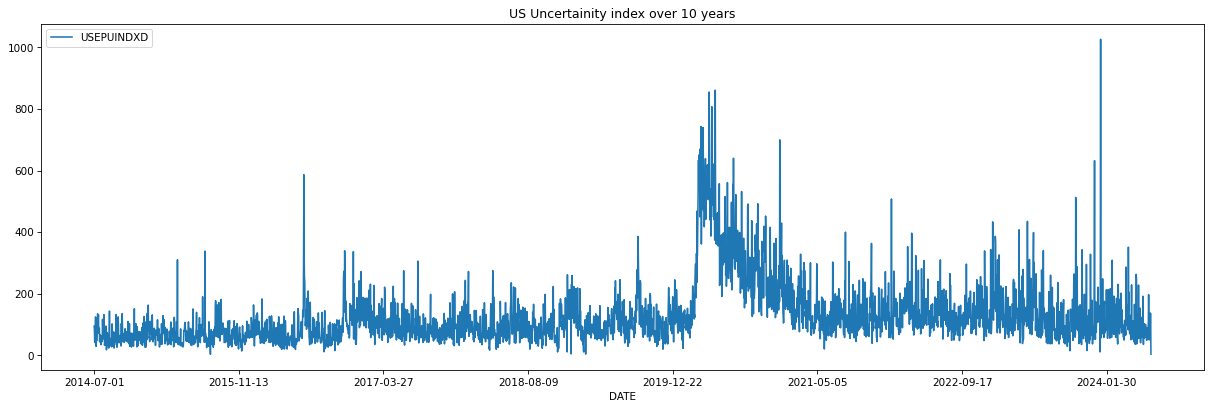

In [512]:
### Now get US Economic policy uncertainity

fig, ax = plt.subplots(figsize=(20, 6))
US_Uncertainity.plot(ax=ax, x_compat=True)  # Use x_compat=True for compatibility with date locators
plt.title('US Uncertainity index over 10 years')

plt.show()

In [514]:
df_GloUncer = pd.read_csv('data\GEPUCURRENT.csv', index_col='DATE', parse_dates=True)
df_USUncer = pd.read_csv(r'data\USEPUINDXD.csv', index_col='DATE', parse_dates=True)
gold_eda

,Close/Last,Volume,Open,High,Low
Date,,,,,
2024-07-02,2333.4,146568.0,2341.6,2346.1,2327.4
2024-07-01,2338.9,136861.0,2336.2,2348.8,2328.2
2024-06-28,2339.6,131191.0,2338.6,2350.6,2329.7
2024-06-27,2336.6,135784.0,2309.4,2342.0,2306.8
2024-06-26,2313.2,182929.0,2331.8,2335.8,2304.7
...,...,...,...,...,...
2014-07-09,1324.3,155101.0,1320.4,1333.4,1318.7
2014-07-08,1316.5,126706.0,1320.8,1325.7,1314.3
2014-07-07,1317.0,79110.0,1321.4,1321.7,1312.1


In [516]:
#gold_eda['GloUncert'] = df_GloUncer['GEPUCURRENT']
gold_eda['USUncert'] = df_USUncer['USEPUINDXD']

#gold_eda.dropna(inplace=True)

gold_eda.head()

,Close/Last,Volume,Open,High,Low,USUncert
Date,,,,,,
2024-07-02,2333.4,146568.0,2341.6,2346.1,2327.4,NaN
2024-07-01,2338.9,136861.0,2336.2,2348.8,2328.2,3.67
2024-06-28,2339.6,131191.0,2338.6,2350.6,2329.7,53.23
2024-06-27,2336.6,135784.0,2309.4,2342.0,2306.8,90.29
2024-06-26,2313.2,182929.0,2331.8,2335.8,2304.7,67.02


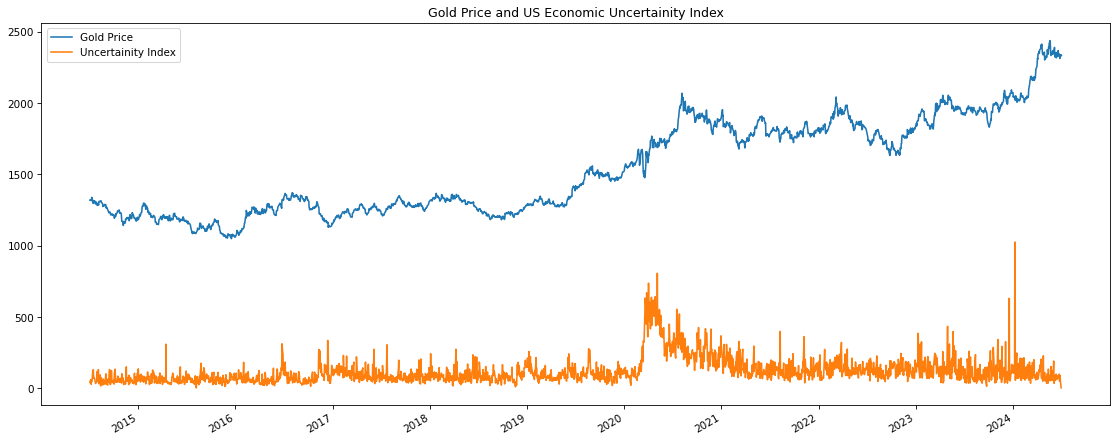

In [518]:
plt.figure(figsize=(15, 6))
gold_eda['Close/Last'].plot()
gold_eda['USUncert'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Gold Price and US Economic Uncertainity Index")
plt.legend(['Gold Price', 'Uncertainity Index'])
plt.tight_layout()
plt.show()

In [520]:
#gold_edaGlobal = gold_eda.drop(['GloUncert'])
gold_eda.dropna()
gold_eda = gold_eda[gold_eda['USUncert'].notna()]
gold_eda

,Close/Last,Volume,Open,High,Low,USUncert
Date,,,,,,
2024-07-01,2338.9,136861.0,2336.2,2348.8,2328.2,3.67
2024-06-28,2339.6,131191.0,2338.6,2350.6,2329.7,53.23
2024-06-27,2336.6,135784.0,2309.4,2342.0,2306.8,90.29
2024-06-26,2313.2,182929.0,2331.8,2335.8,2304.7,67.02
2024-06-25,2330.8,140179.0,2346.8,2349.7,2327.1,49.81
...,...,...,...,...,...,...
2014-07-09,1324.3,155101.0,1320.4,1333.4,1318.7,49.91
2014-07-08,1316.5,126706.0,1320.8,1325.7,1314.3,28.93
2014-07-07,1317.0,79110.0,1321.4,1321.7,1312.1,61.40


In [522]:
gold_df = gold_eda.drop(columns=['Volume','Open','High','Low','USUncert'])
gold_df.tail()


,Close/Last
Date,
2014-07-09,1324.3
2014-07-08,1316.5
2014-07-07,1317.0
2014-07-04,1320.6
2014-07-03,1320.6


In [524]:
gold_df.sort_values(by='Date', ascending=True, inplace=True)
gold_df.head()

,Close/Last
Date,
2014-07-03,1320.6
2014-07-04,1320.6
2014-07-07,1317.0
2014-07-08,1316.5
2014-07-09,1324.3


In [526]:
y_hist, y_future = train_test_split(gold_df, shuffle=False)

In [528]:
y_hist.head()

,Close/Last
Date,
2014-07-03,1320.6
2014-07-04,1320.6
2014-07-07,1317.0
2014-07-08,1316.5
2014-07-09,1324.3


In [530]:
y_hist.tail()

,Close/Last
Date,
2021-12-15,1764.5
2021-12-16,1798.2
2021-12-17,1804.9
2021-12-20,1794.6
2021-12-21,1788.7


In [532]:
def define_d(data):
    X_train = adfuller(data, autolag='AIC')
    adf = X_train[0]
    pvalue = X_train[1]
    critical_value = X_train[4]['5%']
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations', 'Critical Value']
    for value,label in zip(X_train,labels):
        print(label+' : '+str(value) )

    if (pvalue < 0.05):
        print("** Data Is Stationary **")
    else:
        print("** Indicating It Is Non-Stationary **")

define_d(y_hist)

ADF Test Statistic : -0.4887038603885589
p-value : 0.8942020756381077
#Lags Used : 6
Number of Observations : 1889
Critical Value : {'1%': -3.4338164946764294, '5%': -2.863071261312085, '10%': -2.5675851863579537}
** Indicating It Is Non-Stationary **


In [534]:
data_diff = y_hist.diff()
data_diff.dropna(inplace=True)
define_d(data_diff)

ADF Test Statistic : -19.825236740565835
p-value : 0.0
#Lags Used : 5
Number of Observations : 1889
Critical Value : {'1%': -3.4338164946764294, '5%': -2.863071261312085, '10%': -2.5675851863579537}
** Data Is Stationary **


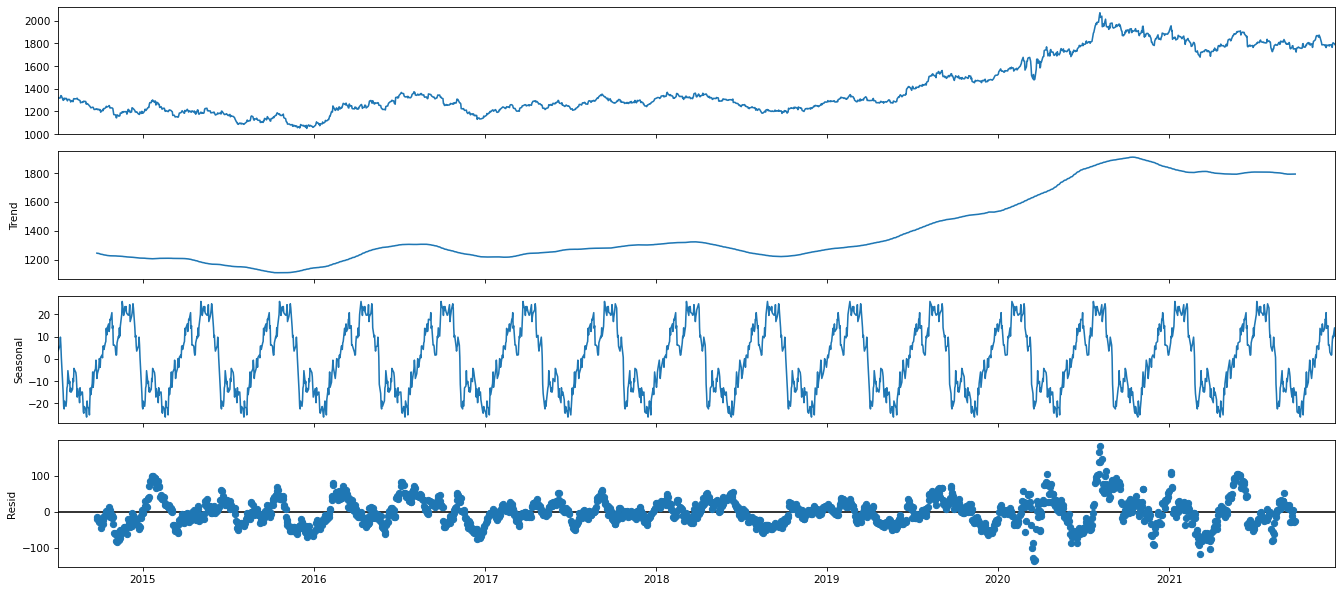

In [536]:
plt.rcParams.update({'figure.figsize':(18,8), 'figure.dpi':75})
result = seasonal_decompose(y_hist, model='additive', period=120)
result.plot()
plt.show()

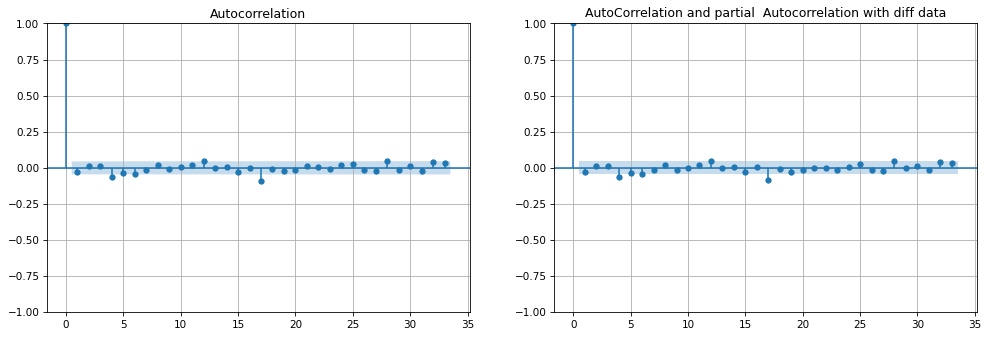

In [544]:
# Diff  automcorrelation
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
plot_acf(data_diff, ax = ax[0]);
ax[0].grid()
plot_pacf(data_diff, ax = ax[1], method = 'ywm');
ax[1].grid()
plt.title("AutoCorrelation and partial  Autocorrelation with diff data")
plt.show()

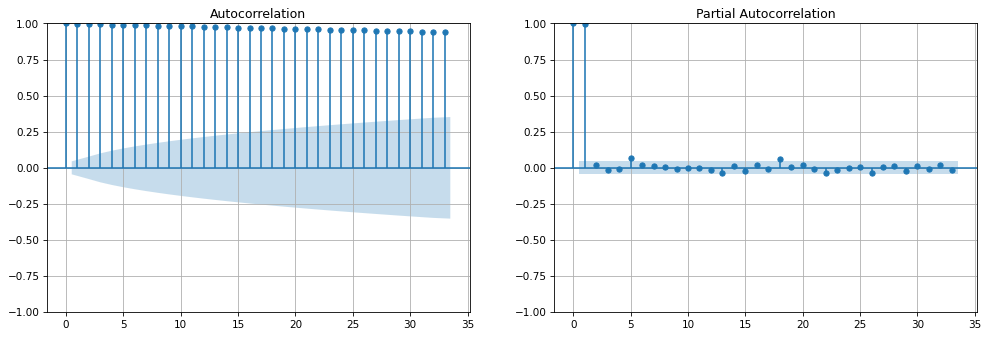

In [546]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
plot_acf(y_hist, ax = ax[0]);
ax[0].grid()
plot_pacf(y_hist, ax = ax[1], method = 'ywm');
ax[1].grid()

In [548]:
from statsmodels.tsa.arima.model import ARIMA
arma = ARIMA(y_hist['Close/Last'], order = (5, 1, 0)).fit()

Date
2014-07-03       0.000000
2014-07-04    1320.591896
2014-07-07    1320.602785
2014-07-08    1317.114917
2014-07-09    1316.459095
Name: predicted_mean, dtype: float64


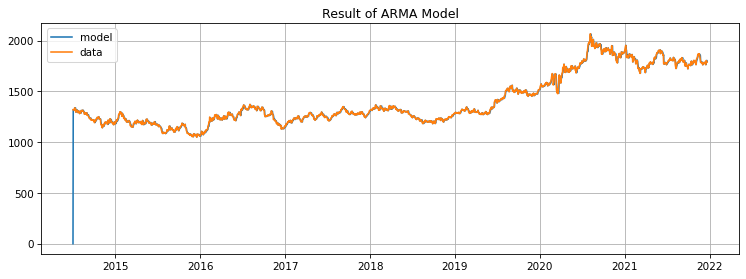

In [550]:
hist_preds = arma.predict()
print(hist_preds.head())
plt.figure(figsize = (12, 4))
plt.plot(y_hist.index, hist_preds, label = 'model')
plt.plot(y_hist, label = 'data')
plt.legend()
plt.grid()
plt.title('Result of ARMA Model');

In [558]:
future_preds = arma.forecast(steps = len(y_future))
future_preds

1896    1786.961817
1897    1785.141938
1898    1785.530147
1899    1786.243990
1900    1786.540148
           ...     
2524    1786.652945
2525    1786.652945
2526    1786.652945
2527    1786.652945
2528    1786.652945
Name: predicted_mean, Length: 633, dtype: float64

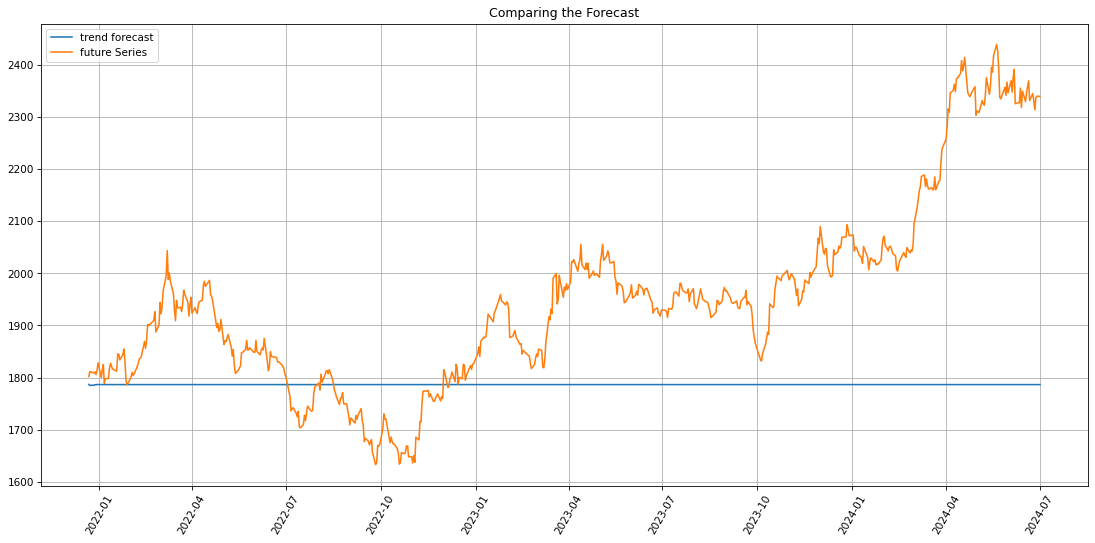

In [560]:
plt.plot(y_future.index, future_preds, label = 'trend forecast')
plt.plot(y_future.index, y_future, label = 'future Series')
plt.title('Comparing the Forecast')
plt.legend();
plt.xticks(rotation = 60)
plt.grid();

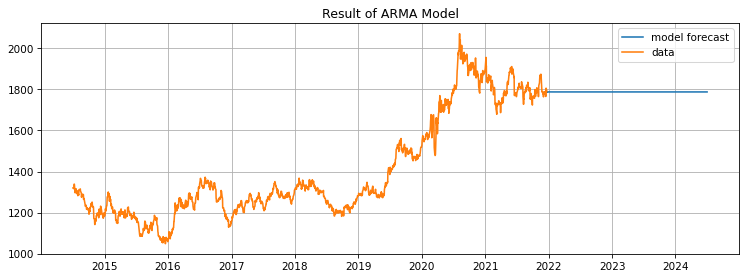

In [562]:
plt.figure(figsize = (12, 4))
plt.plot(y_future.index,future_preds, label = 'model forecast')
plt.plot(y_hist, label = 'data')
plt.legend()
plt.grid()
plt.title('Result of ARMA Model');

In [564]:
from statsmodels.tsa.arima.model import ARIMA
#armaHist = ARIMA(y_hist['Close/Last'], order = (5, 1, 0)).fit()
armaHist = ARIMA(y_hist['Close/Last'].diff().dropna(), order = (5, 1, 0)).fit()
predsHist = armaHist.forecast(len(y_future))
#mse_test = mean_squared_error(predsHist, X_test)

<Axes: xlabel='Date'>

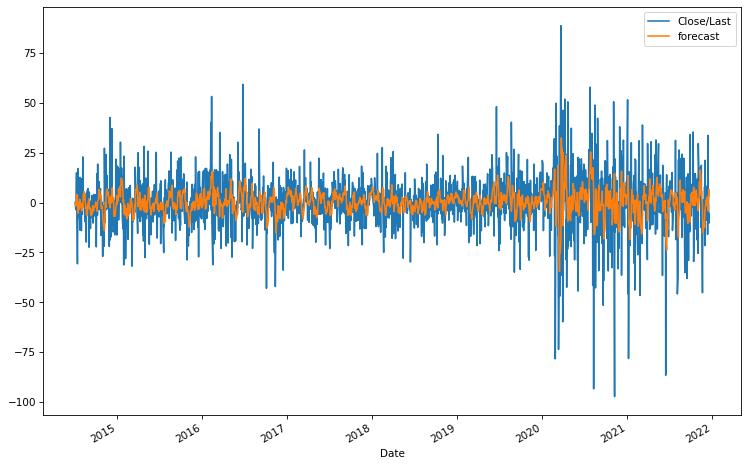

In [568]:
df2= y_hist.diff()
model=ARIMA(df2['Close/Last'].dropna(),order=(5,1,0))
model_fit=model.fit()
df2['forecast']=model_fit.predict()
df2[['Close/Last','forecast']].plot(figsize=(12,8))

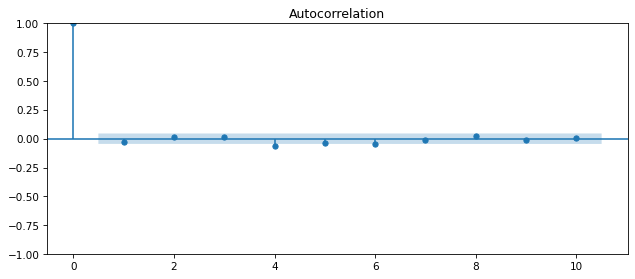

In [578]:
fig, ax = plt.subplots(figsize=(10,4))
tsaplots.plot_acf(data_diff,lags=10, ax=ax)
plt.show()

In [580]:
from sklearn.metrics import mean_squared_error
arma = ARIMA(y_hist.diff(), order = (1, 0, 1)).fit()
preds = arma.forecast(len(y_future))
mse_test = mean_squared_error(preds, y_future)

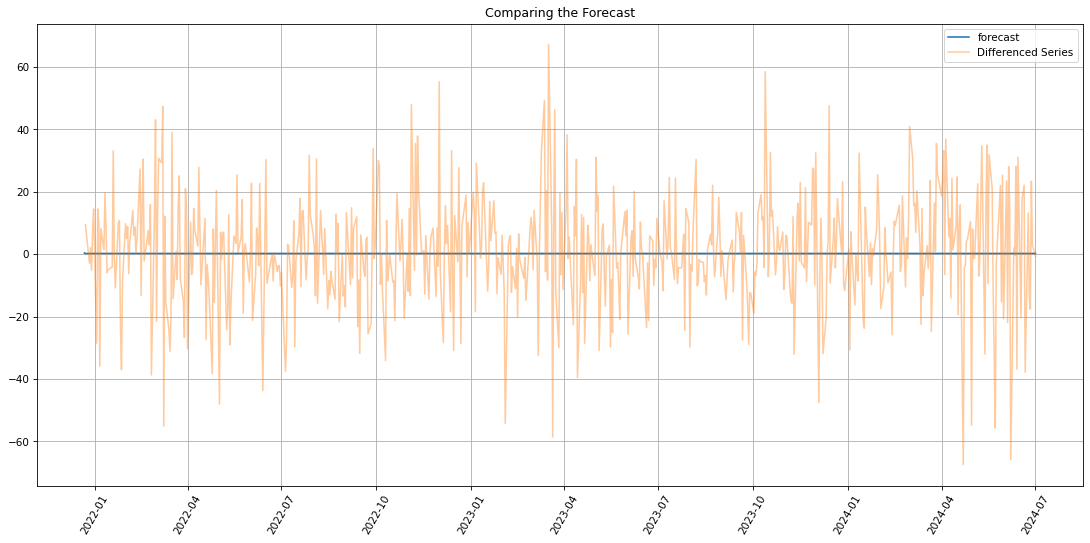

In [582]:
plt.plot(y_future.index, preds, label = 'forecast')
plt.plot(y_future.index, y_future.diff(), label = 'Differenced Series', alpha=0.4)
plt.title('Comparing the Forecast')
plt.legend();
plt.xticks(rotation = 60)
plt.grid();

In [584]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(y_hist,  order=(1, 0, 1), seasonal_order=(1, 1, 0, 12)).fit(disp=0)

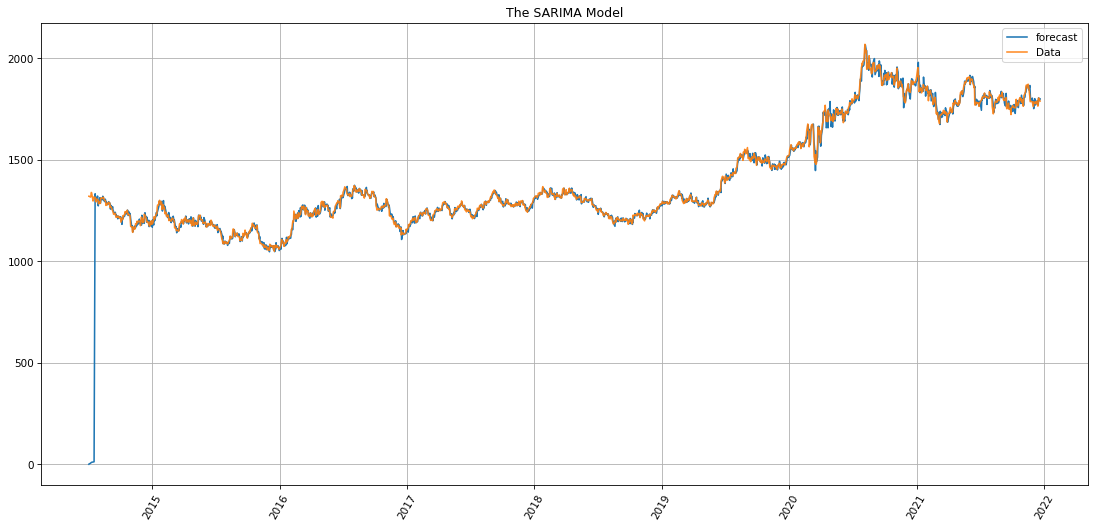

In [586]:
plt.plot(y_hist.index, sarima.predict(),label = 'forecast')
plt.plot(y_hist.index, y_hist, alpha = 0.9,label = 'Data')
plt.xticks(rotation = 60)
plt.title('The SARIMA Model')
plt.legend();
plt.grid();

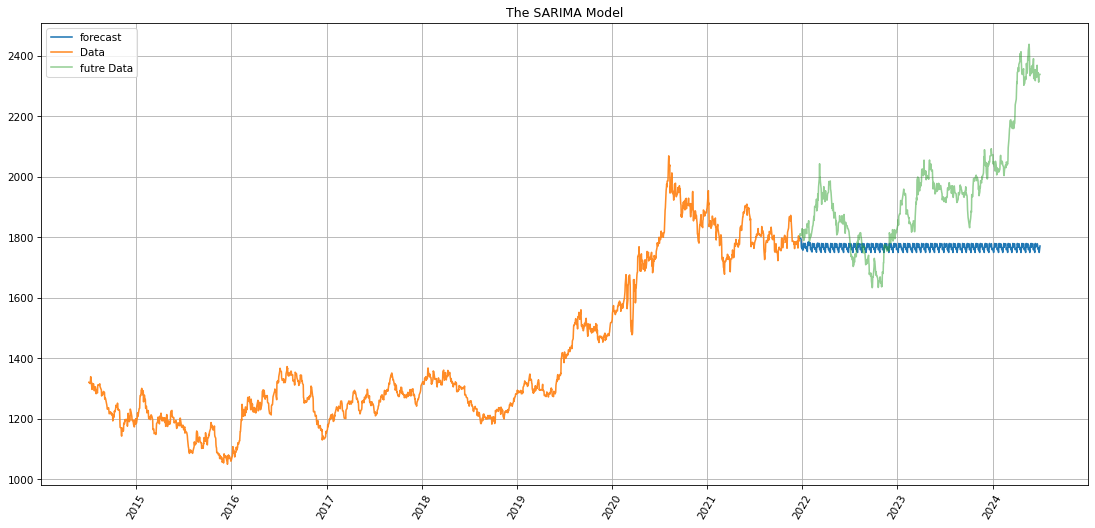

In [588]:
plt.plot(y_future.index, sarima.forecast(steps =len(y_future)),label = 'forecast')
plt.plot(y_hist.index, y_hist, alpha = 0.9,label = 'Data')
plt.plot(y_future.index, y_future, alpha = 0.5,label = 'futre Data')
plt.xticks(rotation = 60)
plt.title('The SARIMA Model')
plt.legend();
plt.grid();

In [590]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          Close/Last   No. Observations:                 1896
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood               -7969.086
Date:                             Thu, 04 Jul 2024   AIC                          15946.172
Time:                                     18:37:12   BIC                          15968.337
Sample:                                          0   HQIC                         15954.335
                                            - 1896                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9371      0.006    153.237      0.000       0.925       0.949
ma.L1         -0.0121      0.017     -0.727      0.467      -0.045       0.021
ar.S.L12      -0.4748      0.014    -34.287      0.000      -0.502      -0.448
sigma2       275.6954      5.619     49.069      0.000     264.683     286.708
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               942.04
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.88   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [593]:
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA

<Axes: xlabel='Date'>

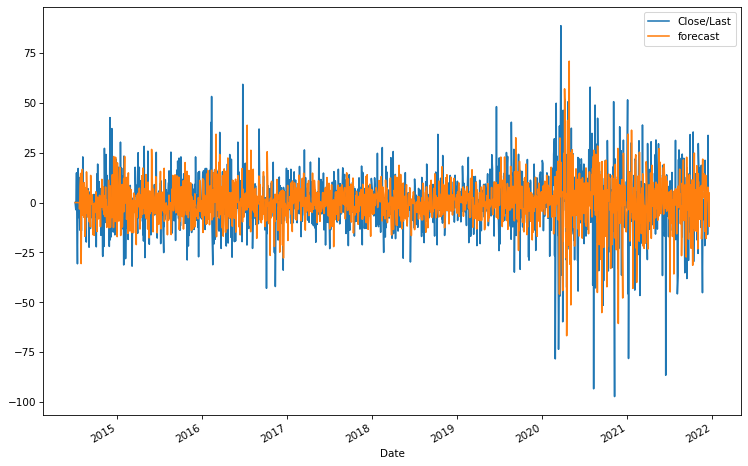

In [597]:
df3= y_hist.diff()
sarima2 = SARIMAX(df3.dropna(),  order=(1, 0, 1), seasonal_order=(1, 1, 0, 12)).fit(disp=0)

df3['forecast']=sarima2.predict()
df3[['Close/Last','forecast']].plot(figsize=(12,8))

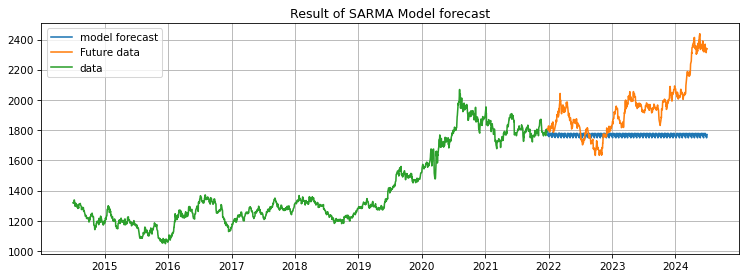

In [599]:
future_preds2 = sarima.forecast(steps = len(y_future))

plt.figure(figsize = (12, 4))
plt.plot(y_future.index,future_preds2, label = 'model forecast')
plt.plot(y_future, label = 'Future data')
plt.plot(y_hist, label = 'data')
plt.legend()
plt.grid()
plt.title('Result of SARMA Model forecast');

In [617]:
index_9_months = pd.date_range(y_future.index[-1], freq='MS', periods=9)
index_9_months
sarima = SARIMAX(y_future,  order=(1, 0, 1), seasonal_order=(1, 1, 0, 9)).fit(disp=0)

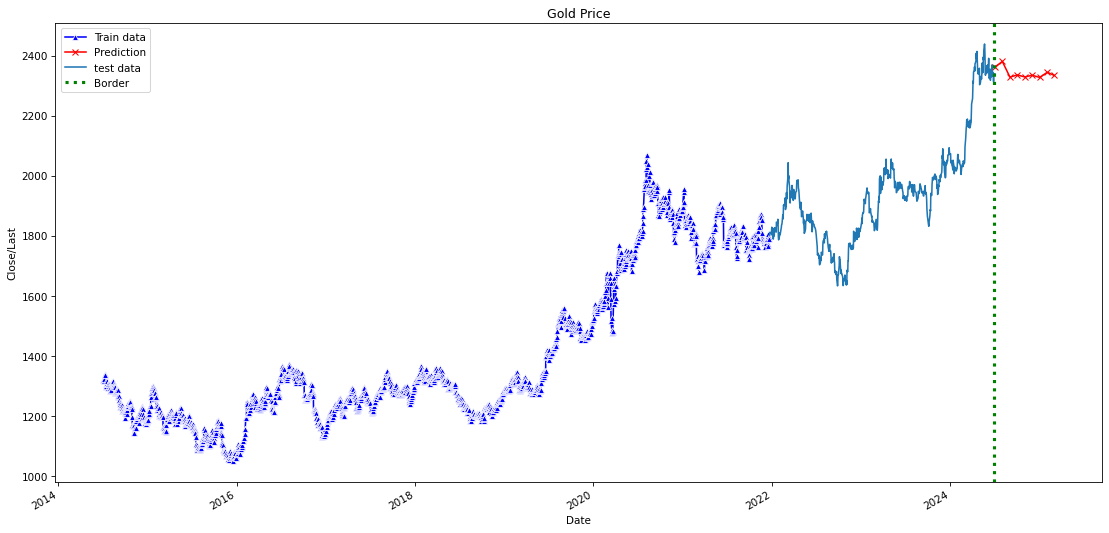

In [619]:
gold_forecast = sarima.forecast(9)
gold_forecast.index =pd.to_datetime(index_9_months)
gold_forecast = pd.DataFrame(gold_forecast.rename("Prediction"))

fig, ax = plt.subplots(figsize = (18, 9))
sns.lineplot(x = 'Date', y='Close/Last', data=y_hist, color = 'blue', marker = '^', label = 'Train data')
gold_forecast.plot(ax = ax, c = 'red', marker = 'x', label = 'Prediction')
plt.plot(y_future, label = 'test data')
plt.title('Gold Price')
ax.axvline(x = 19900, ls = ':', linewidth = 3, c = 'green', label = 'Border')
plt.legend()
plt.show()

In [626]:
# Time to find correlation
gold_eda.corr


<bound method DataFrame.corr of             Close/Last    Volume    Open    High     Low  USUncert
Date                                                              
2024-07-01      2338.9  136861.0  2336.2  2348.8  2328.2      3.67
2024-06-28      2339.6  131191.0  2338.6  2350.6  2329.7     53.23
2024-06-27      2336.6  135784.0  2309.4  2342.0  2306.8     90.29
2024-06-26      2313.2  182929.0  2331.8  2335.8  2304.7     67.02
2024-06-25      2330.8  140179.0  2346.8  2349.7  2327.1     49.81
...                ...       ...     ...     ...     ...       ...
2014-07-09      1324.3  155101.0  1320.4  1333.4  1318.7     49.91
2014-07-08      1316.5  126706.0  1320.8  1325.7  1314.3     28.93
2014-07-07      1317.0   79110.0  1321.4  1321.7  1312.1     61.40
2014-07-04      1320.6       NaN  1320.6  1320.6  1320.6     52.44
2014-07-03      1320.6     980.0  1321.1  1321.5  1319.8     41.51

[2529 rows x 6 columns]>